In [9]:
#Задача 1
#Известно, что генеральная совокупность распределена нормально с известным средним квадратическим отклонением 16. 
#Найти доверительный интервал для оценки математического ожидания mu с надёжностью 0.95, если выборочное среднее равно 80, 
#а объём равен 256.
import numpy as np
import scipy.stats as sps

mean = 80
std = 16
p = 0.95
n = 256

alpha = 1 - p
t1 = sps.norm.ppf(alpha/2)
t2 = sps.norm.ppf(1 - alpha/2)
t1, t2

(mean + t1 * std / np.sqrt(n), mean + t2 * std / np.sqrt(n))

(78.04003601545995, 81.95996398454005)

Гипотеза о среднем весе пачки печенья равном 200 г - верна
Значение статистики -1.1227217828476797
p-value = 0.2906124467109305


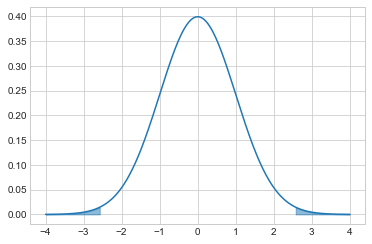

In [27]:
#Задача 2
#Продавец утверждает, что средний вес пачки печенья составляет 200 г. Из партии извлечена выборка из 10 пачек. 
#Вес каждой пачки составляет:
#202, 203, 199, 197, 195, 201, 200, 204, 194, 190
#Известно, что их веса распределены нормально.
#1. Верно ли утверждение продавца, если учитывать, что уровень значимости равен 1%?
#2. Найдите P-значение для данного теста.

samples = np.array([202, 203, 199, 197, 195, 201, 200, 204, 194, 190])
mean = samples.mean()
std = samples.std()
n = samples.shape[0]

alpha = 0.01
mean, std

t = (mean - 200) / (std/np.sqrt(n))
t1 = sps.norm.ppf(alpha/2)
t2 = sps.norm.ppf(1 - alpha/2)

if (t < t1) or (t > t2):
    print('Гипотеза о среднем весе пачки печенья равном 200 г - неверна')
else:
    print('Гипотеза о среднем весе пачки печенья равном 200 г - верна')

print(f'Значение статистики {t}')

from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

ox = np.linspace(-4, 4, 500)
oy = sps.norm.pdf(ox)
ox_left = np.linspace(-4, t1, 100)
oy_left = sps.norm.pdf(ox_left)
ox_right = np.linspace(t2, 4, 100)
oy_right = sps.norm.pdf(ox_right)
plt.plot(ox, oy)
plt.fill_between(ox_left, oy_left, alpha=0.5, color='C0')
plt.fill_between(ox_right, oy_right, alpha=0.5, color='C0')

#p-value
p_left = sps.t.cdf(t, df=n - 1)
p_right = 1 - sps.t.cdf(t, df=n - 1)
pvalue = 2 * min(p_left, p_right)
print(f'p-value = {pvalue}')

In [30]:
#Задача 3
#Утверждается, что шарики для подшипников, изготовленные автоматическим станком, имеют средний диаметр 17 мм. 
#Используя уровень значимости 0.025 и правостороннюю критическую область, проверить данную гипотезу при условии, 
#что в выборке из 100 шариков средний диаметр оказался равным 17.5 мм, а дисперсия известна и равна 4 мм.

mean = 17.5
alpha = 0.025
n = 100
x_obs = 17.5
std = np.sqrt(4)

z = (mean - 17) / (std/np.sqrt(n))
p_right = 1 - sps.t.cdf(z, df=n - 1)

if p_right < alpha:
    print('Гипотеза неверна')
else:
    print('Гипотеза верна')
print(p_right, alpha)

Гипотеза неверна
0.007031298460574598 0.025


Гипотеза верна
11.688551922452438 38.0756272503558 28.720541753333343


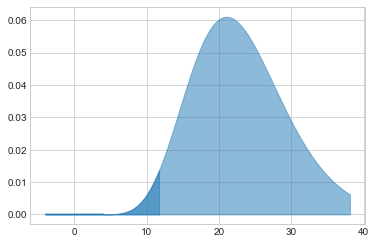

In [40]:
#Задача 4 (Дополнительно)
#Дана выборка диаметров подшипников из примера 1 с занятия 5:
#samples = [0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 1.1134,
#1.2088, 1.701 , 1.0282, 1.3579, 1.0191, 1.1784, 1.1168, 1.1372,
#0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 1.0865, 1.02 ]
#Предполагая, что диаметры подшипников распределены нормально, проверьте гипотезу о том, 
#что дисперсия случайной величины равна 0.0625 при уровне значимости alpha = 0.05. 
#Что для этого нужно знать:
#1. Альтернативная гипотеза двухсторонняя.
#2. Статистика для теста: H = (n - 1) * sample_variance / variance, где n - число элементов в выборке, 
#sample_variance - несмещённая оценка дисперсии, variance - утверждаемая нулевой гипотезой дисперсия.
#3. Эта статистика в предположении верности нулевой гипотезы имеет распределение хи-квадрат с параметром df = n - 1. 
#Её квантили можно найти с помощью функции scipy.stats.chi2.ppf.

samples = np.array([0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 1.1134, 
                    1.2088, 1.701 , 1.0282, 1.3579, 1.0191, 1.1784, 1.1168, 1.1372,
                    0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 1.0865, 1.02])
alpha = 0.05
variance = 0.0625
sample_variance = samples.var(ddof=1)
n = samples.shape[0]
mean = samples.mean()

H = (n - 1) * sample_variance / variance

#p_left = sps.chi2.ppf(H, df=n - 1)
#p_right = 1 - sps.chi2.ppf(H, df=n - 1)
#pvalue = 2 * min(p_left, p_right)

#scipy.stats.chi2.ppf

t1 = sps.chi2.ppf(alpha/2, df = n - 1)
t2 = sps.chi2.ppf(1 - alpha/2, df = n - 1)


if (H < t1) or (H > t2):
    print('Гипотеза неверна')
else:
    print('Гипотеза верна')

print(t1, t2, H)

plt.style.use('seaborn-whitegrid')

ox = np.linspace(-4, 4, 500)
oy = sps.chi2.pdf(ox, df = n-1)
ox_left = np.linspace(-4, t1, 100)
oy_left = sps.chi2.pdf(ox_left, df = n-1)
ox_right = np.linspace(t2, 4, 100)
oy_right = sps.chi2.pdf(ox_right, df = n-1)
plt.plot(ox, oy)
plt.fill_between(ox_left, oy_left, alpha=0.5, color='C0')
plt.fill_between(ox_right, oy_right, alpha=0.5, color='C0')
